In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import climate as cli
import imp
imp.reload(cli)

plt.style.use('default')
plt.rcParams.update({'font.size': 16})
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [8]:
data = pd.read_csv("DATA111_2DAILY_V1.csv")
data['YEAR'] = data['YEAR'].astype(int)

In [9]:
# To better visualyze the heat waves we wil work with a shifted dataframe starting in winter

data['NEW_DAY'] = data['DAY365']

data.loc[data['DAY365'] < 152 ,'NEW_DAY'] = data[data['DAY365'] < 152]['DAY365'].values + 214
data.loc[data['DAY365'] >= 152, 'NEW_DAY'] = data[data['DAY365'] >= 152]['DAY365'].values - 151

# Getting heatwaves and coldwaves flags

In [10]:
% time
flag_heat1 = 'CTX90pct'
flag_unique1 = 'unique_CTX90pct'
# var_temperature = 'MEAN_N_AIRTMP_MED10'
percentile = .90

# Getting index CTX90pct
fv = cli.get_heatwave(data, flag_heat1, hw_name = flag_unique1, percentile=percentile, index = 'CTX90pct')


# Getting COLDWAVE index CTN90pct
percentile = .1
flag_heat3 = 'Cold_CTN90pct'
flag_unique3 = 'unique_cold_CTN90pct'
fv = cli.get_coldwave(fv, flag_heat3, cw_name = flag_unique3, percentile=percentile, index = 'CTN90pct')

Wall time: 0 ns


# Heatwaves with index = 'CTX90pct'

Legend:
- yellow : Air temperature < mean
- reds : mean <= Air temperature < pct90
- black : Air temperature >= pct90

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


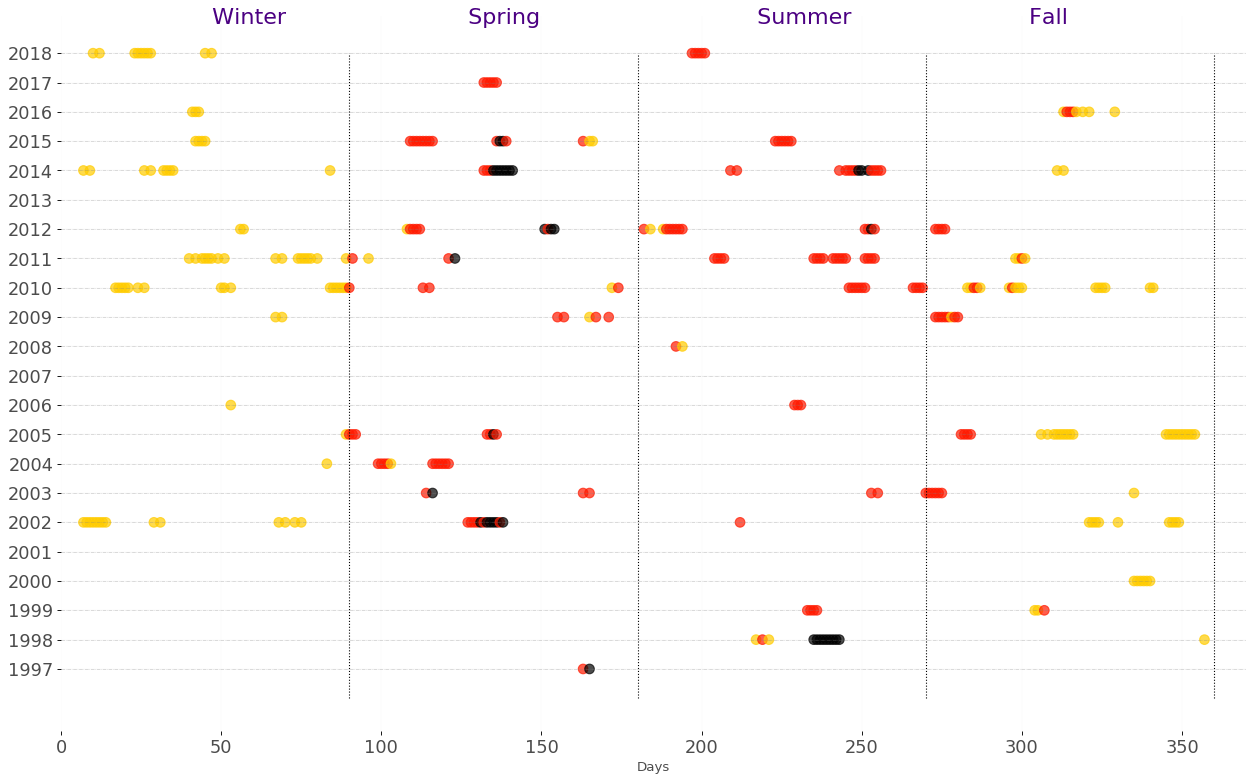

In [11]:
cli.plot_heatwave(fv,flag_heat1,savefig="fig/HEATWAVES")

# Cold waves

According to Forzieri

https://www.researchgate.net/publication/301537238_Multi-hazard_assessment_in_Europe_under_climate_change

auxiliar:

https://www.nat-hazards-earth-syst-sci.net/16/821/2016/nhess-16-821-2016.pdf

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


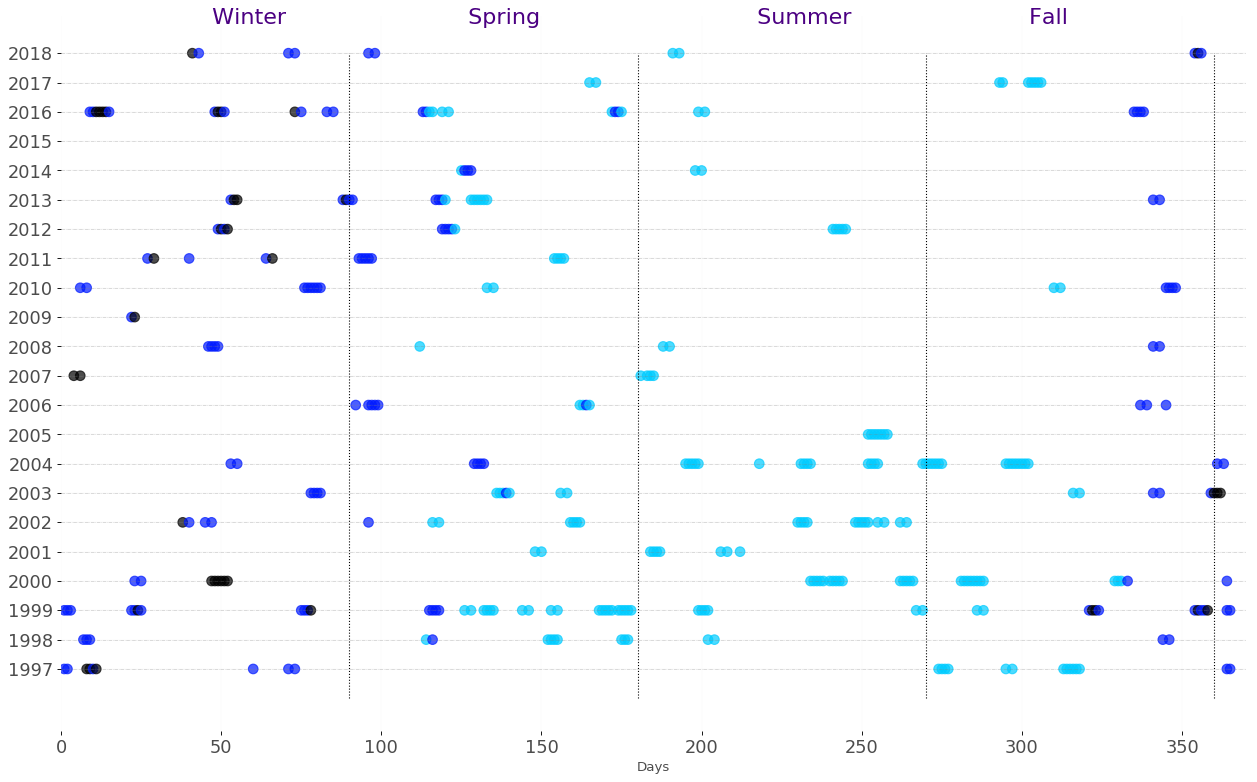

In [12]:
cli.plot_coldwave(fv,flag_heat3,savefig="fig/COLDWAVES")

# Evolution of count HW by years

In [13]:
to_plot = fv[fv[flag_unique1] != 0].groupby('YEAR').agg({flag_unique1 : lambda x: x.nunique()}).reset_index()
to_plot3 = fv[fv[flag_unique3] != 0].groupby('YEAR').agg({flag_unique3 : lambda x: x.nunique()}).reset_index()

to_plot = to_plot.merge(to_plot3, on = 'YEAR', how='left')

In [14]:
flag_unique3

'unique_cold_CTN90pct'

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


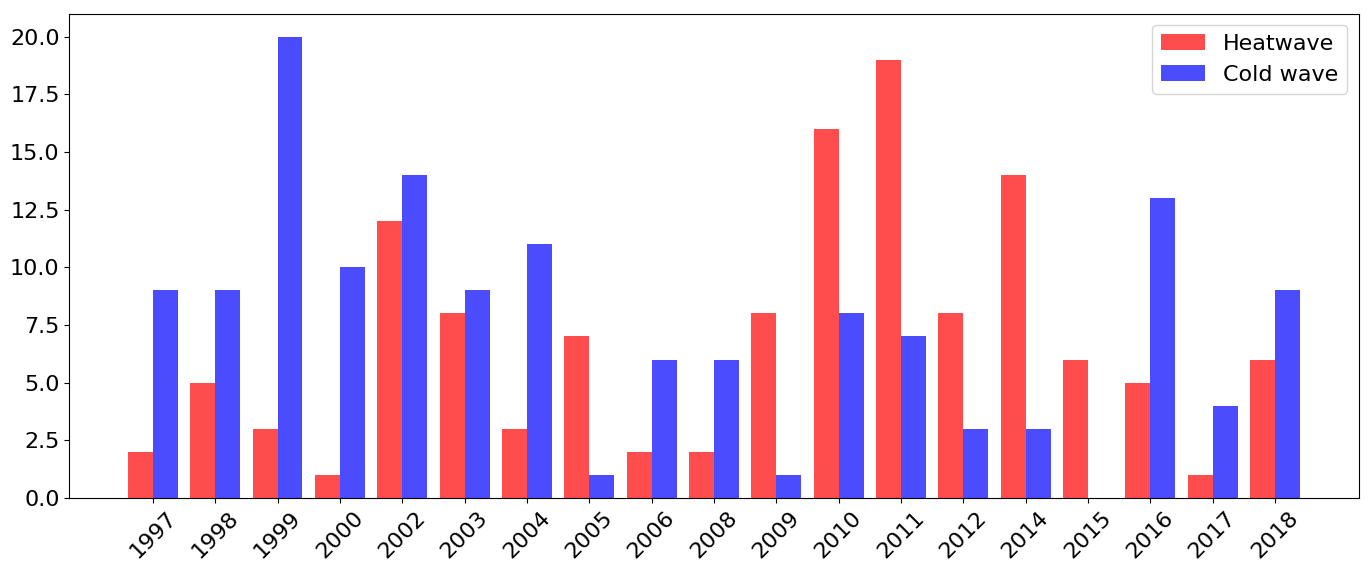

In [15]:
plt.figure(figsize=(14,6))
width = 0.40

plt.bar(np.arange(to_plot.shape[0]) - width/2, to_plot[flag_unique1], width = width,label='Heatwave',color='r',alpha = 0.7)
plt.bar(np.arange(to_plot.shape[0]) + width/2,to_plot[flag_unique3], width = width,label='Cold wave',color='b',alpha = 0.7)

plt.xticks(np.arange(to_plot.shape[0]),to_plot['YEAR'], rotation = 45)

plt.legend()
plt.show()

 So we have some tendence to have more HW by recent years

# Duration of HW

In [16]:
duration_tmax = []
duration_cold = []

for v in fv.YEAR.unique():
    fv_aux = fv[fv['YEAR'] == v]
    
    get = fv_aux[fv_aux[flag_unique1]!= 0].groupby(flag_unique1).agg({flag_heat1 : np.sum}).reset_index()
    if(get.shape[0] > 0):
        duration_tmax.append(get[flag_heat1].mean())
    else:
        duration_tmax.append(0)
    
        
    get = fv_aux[fv_aux[flag_unique3]!= 0].groupby(flag_unique3).agg({flag_heat3: np.sum}).reset_index()
    if(get.shape[0]> 0):
        duration_cold.append(get[flag_heat3].mean())
    else:
        duration_cold.append(0)

In [17]:
len(duration_tmax)

22

In [18]:
fv.YEAR.nunique()

22

### Mean duration of heat and cold waves

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


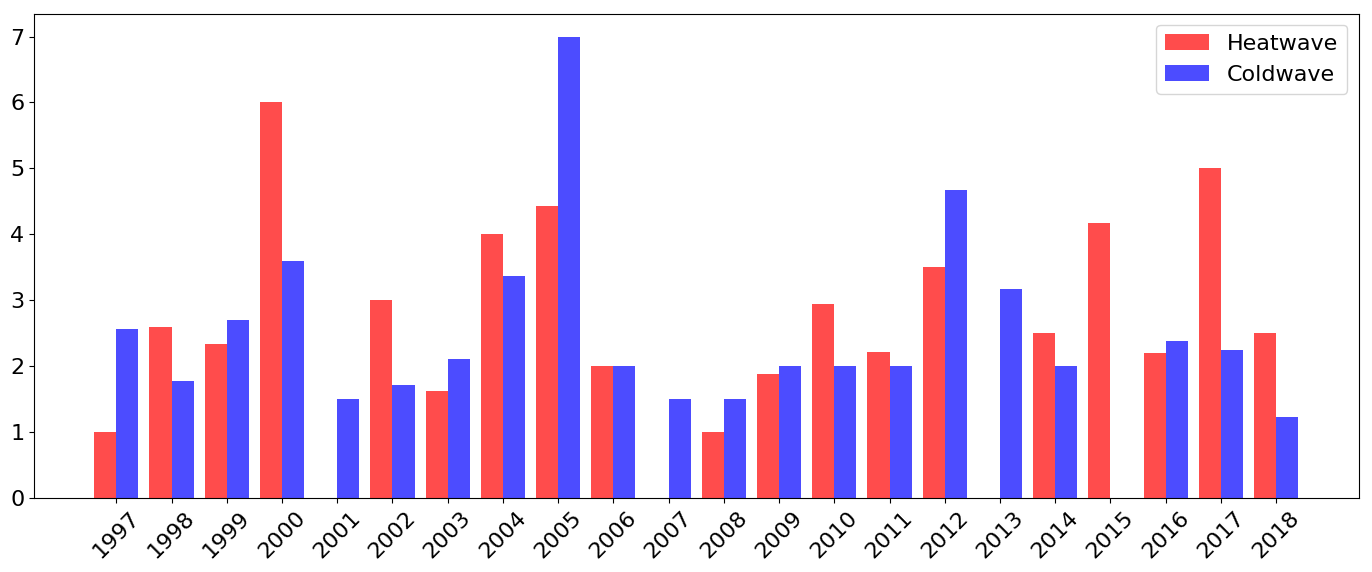

In [19]:
plt.figure(figsize=(14,6))
width = 0.40

plt.bar(np.arange(len(duration_tmax)) - width/2, duration_tmax, width = width,label='Heatwave', color='r', alpha=0.7)
plt.bar(np.arange(len(duration_cold)) + width/2,duration_cold, width = width,label='Coldwave', color='b', alpha=0.7)

plt.xticks(np.arange(fv['YEAR'].nunique()),fv['YEAR'].unique(), rotation = 45)

plt.legend()
plt.show()

It seems that there is no relation between recent years and hw durations

In [20]:
duration_tmax = []
duration_cold = []

for v in fv.YEAR.unique():
    fv_aux = fv[fv['YEAR'] == v]
    
    get = fv_aux[fv_aux[flag_unique1]!= 0].groupby(flag_unique1).agg({flag_heat1 : np.sum}).reset_index()
    if(get.shape[0] > 0):
        duration_tmax.append(get[flag_heat1].max())
    else:
        duration_tmax.append(0)    
        
    get = fv_aux[fv_aux[flag_unique3]!= 0].groupby(flag_unique3).agg({flag_heat3: np.sum}).reset_index()
    if(get.shape[0]> 0):
        duration_cold.append(get[flag_heat3].max())
    else:
        duration_cold.append(0)

### Max duration of heat/cold waves

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


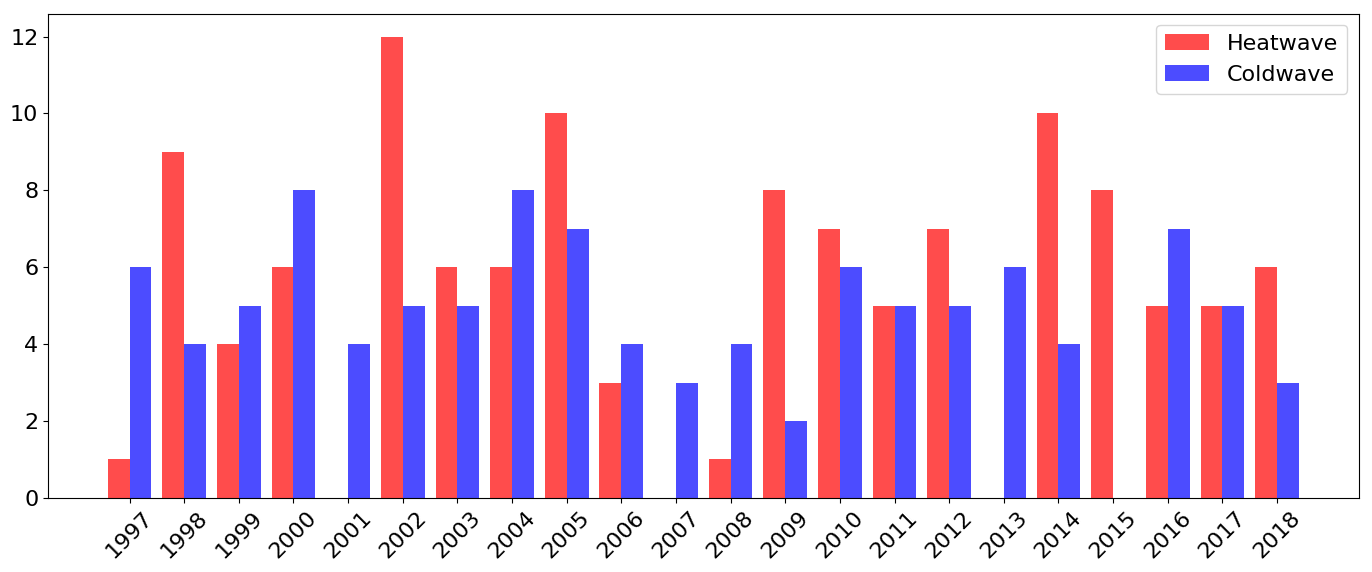

In [21]:
plt.figure(figsize=(14,6))
width = 0.40

plt.bar(np.arange(len(duration_tmax)) - width/2, duration_tmax, width = width,label='Heatwave', color='r', alpha=0.7)
plt.bar(np.arange(len(duration_cold)) + width/2,duration_cold, width = width,label='Coldwave', color='b', alpha=0.7)

plt.xticks(np.arange(fv['YEAR'].nunique()),fv['YEAR'].unique(), rotation = 45)

plt.legend()
plt.show()

# How many days each year were under heat/cold waves?

In [22]:
get = fv.groupby('YEAR').agg({flag_heat3: np.sum}).reset_index()

get2 = fv.groupby('YEAR').agg({flag_heat1: np.sum}).reset_index()

get = get.merge(get2, on='YEAR', how='left')

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


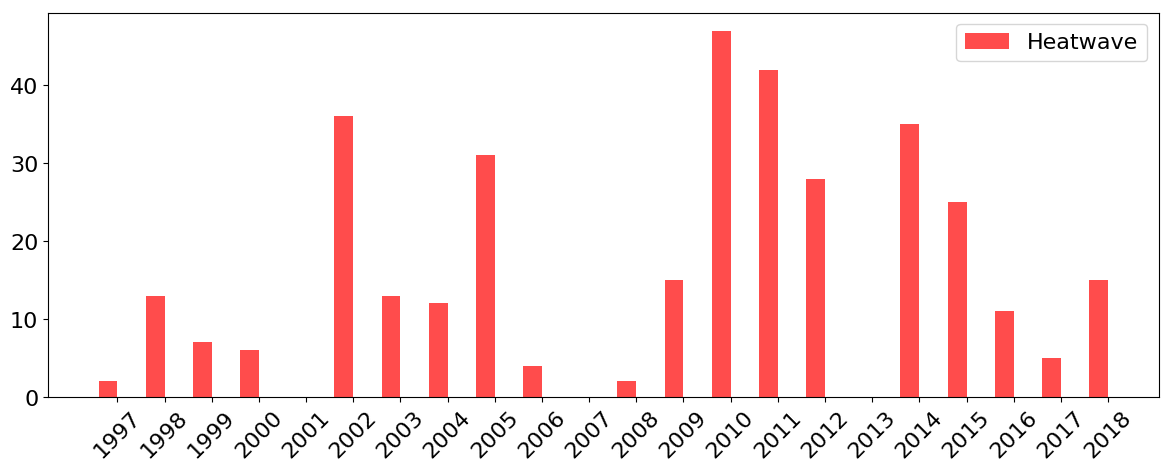

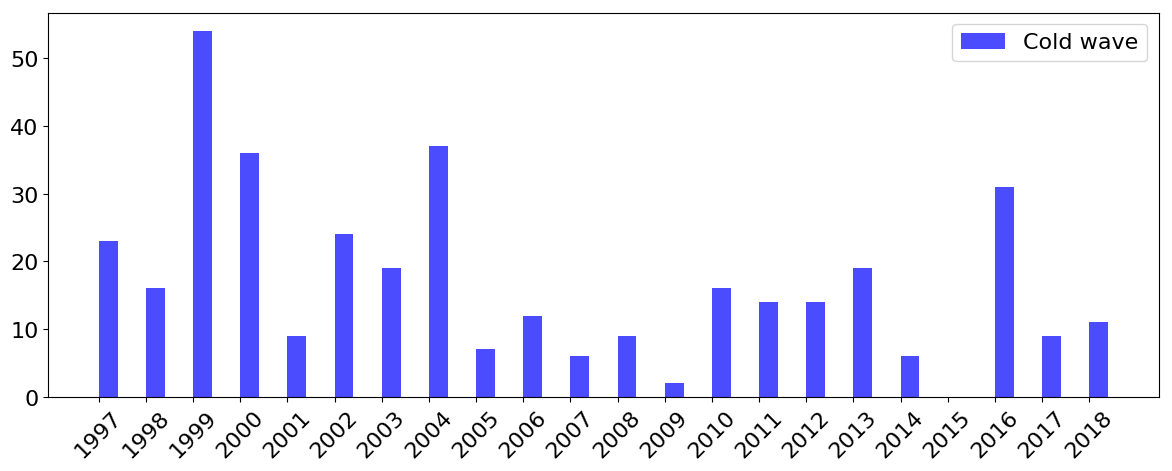

In [23]:
plt.figure(figsize=(12,5))
width = 0.40

plt.bar(np.arange(get.shape[0]) - width/2, get[flag_heat1], width = width,label='Heatwave', color='r', alpha=0.7)
plt.xticks(np.arange(get.shape[0]),get['YEAR'], rotation = 45)

plt.legend()
plt.savefig('fig/DIAS_HEATWAVE')
plt.show()


plt.figure(figsize=(12,5))
plt.bar(np.arange(get.shape[0]) + width/2,get[flag_heat3], width = width,label='Cold wave', color='b' , alpha=0.7)

plt.xticks(np.arange(get.shape[0]),get['YEAR'], rotation = 45)

plt.legend()
plt.savefig('fig/DIAS_COLDWAVE')
plt.show()

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


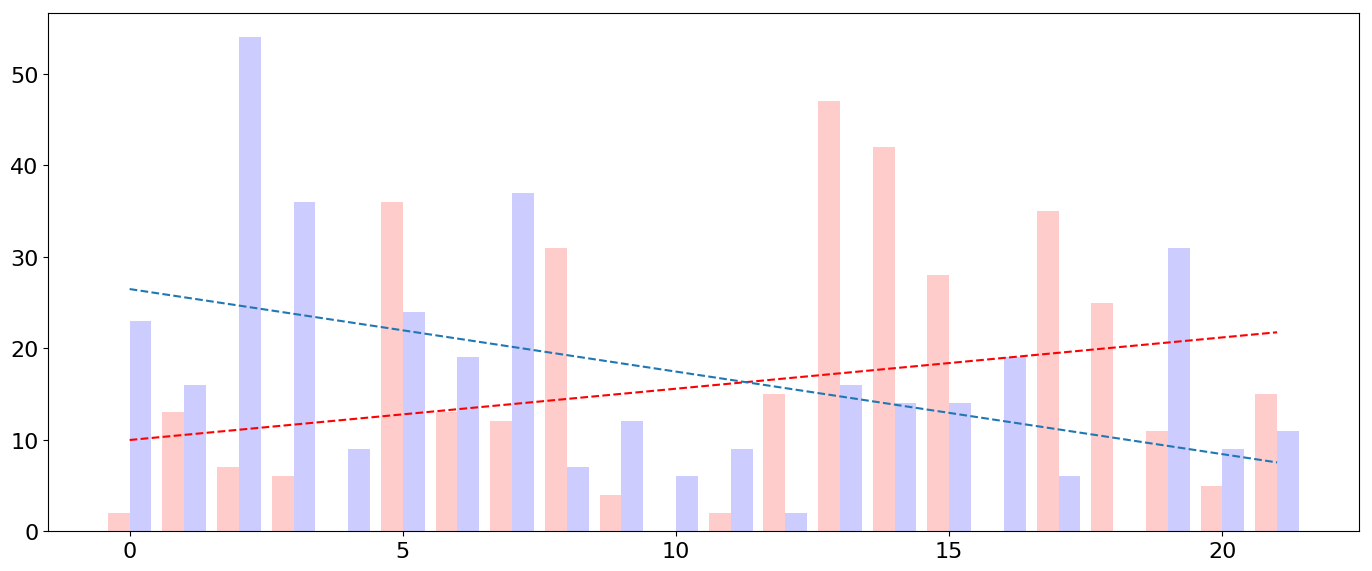

In [24]:
# Creating a scatter plot with best fit line plot

#Heatwave
y_values = get.loc[:, flag_heat1]
x_values = np.linspace(0,1,len(get.loc[:, flag_heat1]))
poly_degree = 1

coeffs = np.polyfit(x_values, y_values, poly_degree)
poly_eqn = np.poly1d(coeffs)
y_hat_heat = poly_eqn(x_values)

#Coldwave
y_values = get.loc[:, flag_heat3]
x_values = np.linspace(0,1,len(get.loc[:, flag_heat3]))
poly_degree = 1

coeffs = np.polyfit(x_values, y_values, poly_degree)
poly_eqn = np.poly1d(coeffs)
y_hat_cold = poly_eqn(x_values)


plt.figure(figsize=(14,6))
plt.bar(np.arange(get.shape[0]) - width/2, get[flag_heat1], width = width,label='Heatwave', color='r', alpha=0.2)
plt.bar(np.arange(get.shape[0]) + width/2,get[flag_heat3], width = width,label='Cold wave', color='b' , alpha=0.2)

plt.plot(np.arange(get.shape[0]),y_hat_heat,color='r', linestyle='--')

plt.plot(np.arange(get.shape[0]),y_hat_cold, linestyle='--')


# Visualization of Heatwaves and temperatures of 2011 and 2014

In [25]:
# getting series of pct90 min and max along this year

df_2014 = fv[fv['YEAR'] == 2011]

percentile = .9
day_name = 'DAY365'
max_tmp_name = 'MAX_N_AIRTMP_MED10'
min_tmp_name = 'MIN_N_AIRTMP_MED10'


pth_max = []
pth_min = []

for d in df_2014.DAY365.unique():
    # For each day we will have a different pct
    df_pct = data[(data[day_name] >= d-14) & (data[day_name] <= d + 14)]

    pth_max.append(df_pct[max_tmp_name].quantile(percentile))
    pth_min.append(df_pct[min_tmp_name].quantile(0.1))
    

In [26]:
df_2014.shape

(365, 80)

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


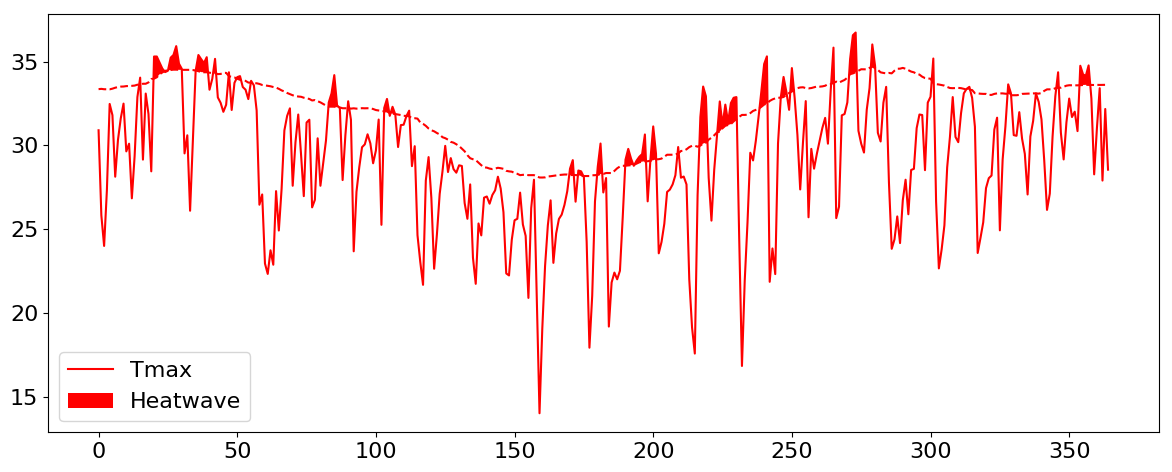

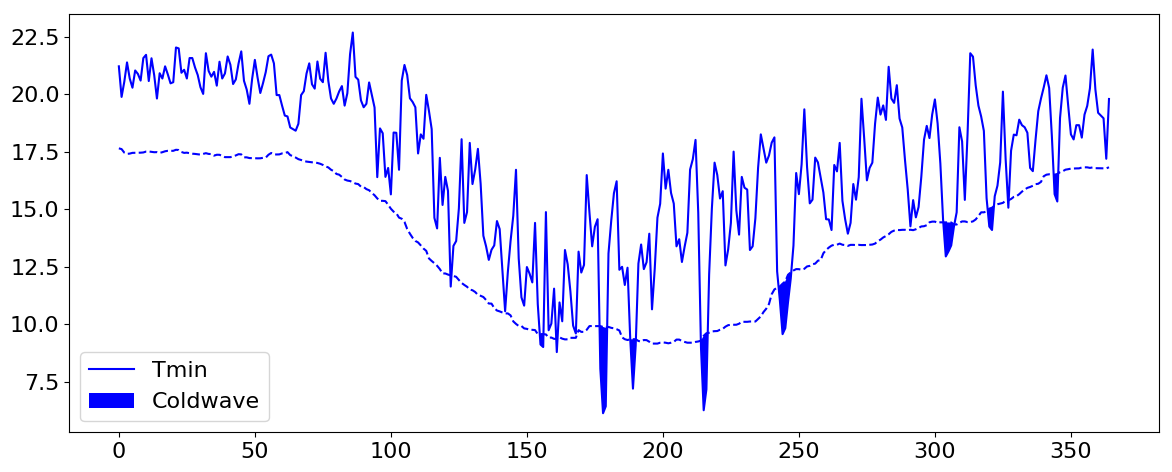

In [27]:
plt.figure(figsize=(12,5))

x = np.arange(len(pth_max))
y1 = df_2014[max_tmp_name]
y2 = pth_max

plt.plot(x,y1, color='r', label='Tmax')
plt.plot(x,y2, color= 'r', linestyle = '--')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True,label='Heatwave')

# plt.xticks(np.arange(df_2014.DAY365.nunique()), df_2014.DAY365.unique(), rotation = 90)
plt.savefig("fig/HEATWAVES_2011")
plt.legend()
plt.show()


plt.figure(figsize=(12,5))
x = np.arange(len(pth_min))
y1 = df_2014[min_tmp_name]
y2 = pth_min
plt.plot(x,y1,color='b', label='Tmin')
plt.plot(x,y2, color= 'b', linestyle = '--')
plt.fill_between(x, y1, y2, where=y1 <= y2, facecolor='blue', interpolate=True, label='Coldwave')

# plt.xticks(np.arange(df_2014.DAY365.nunique()), df_2014.DAY365.unique(), rotation = 90)
plt.savefig("fig/COLDWAVES_2011")
plt.legend()
plt.show()

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


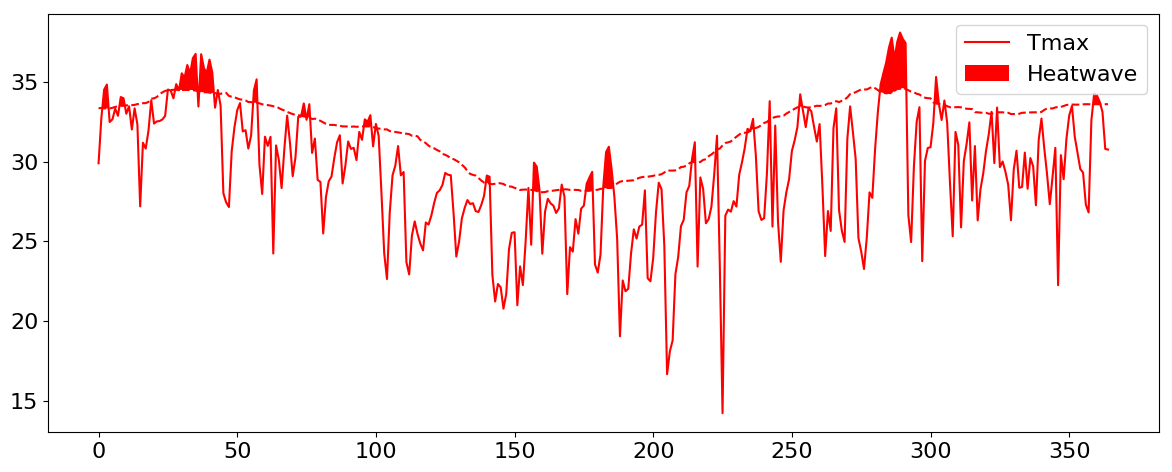

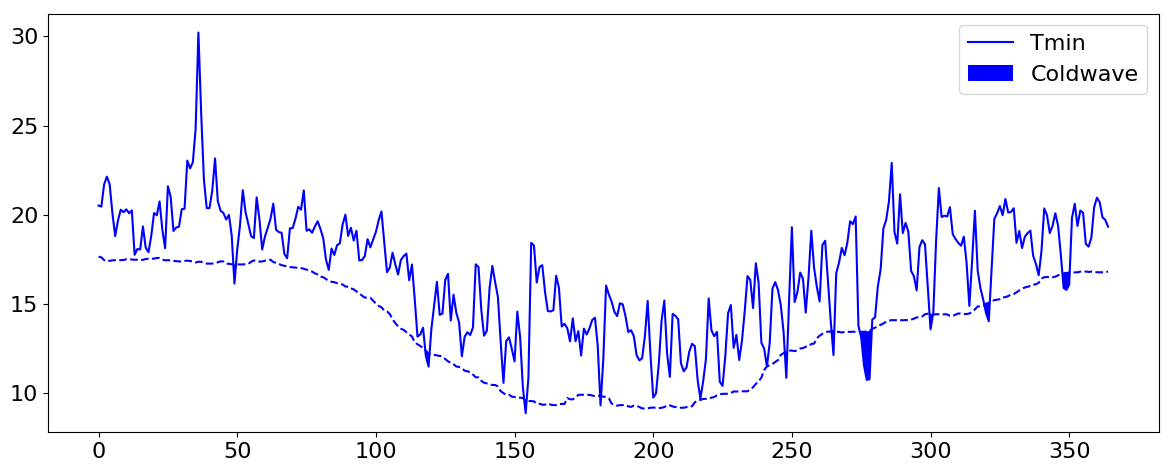

In [28]:
# getting series of pct90 min and max along this year

df_2014 = fv[fv['YEAR'] == 2014]

percentile = .9
day_name = 'DAY365'
max_tmp_name = 'MAX_N_AIRTMP_MED10'
min_tmp_name = 'MIN_N_AIRTMP_MED10'


pth_max = []
pth_min = []

for d in df_2014.DAY365.unique():
    # For each day we will have a different pct
    df_pct = data[(data[day_name] >= d-14) & (data[day_name] <= d + 14)]

    pth_max.append(df_pct[max_tmp_name].quantile(percentile))
    pth_min.append(df_pct[min_tmp_name].quantile(0.1))
    
plt.figure(figsize=(12,5))

x = np.arange(len(pth_max))
y1 = df_2014[max_tmp_name]
y2 = pth_max

plt.plot(x,y1, color='r', label='Tmax')
plt.plot(x,y2, color= 'r', linestyle = '--')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True,label='Heatwave')

# plt.xticks(np.arange(df_2014.DAY365.nunique()), df_2014.DAY365.unique(), rotation = 90)
plt.savefig("fig/HEATWAVES_2014")
plt.legend()
plt.show()


plt.figure(figsize=(12,5))
x = np.arange(len(pth_min))
y1 = df_2014[min_tmp_name]
y2 = pth_min
plt.plot(x,y1,color='b', label='Tmin')
plt.plot(x,y2, color= 'b', linestyle = '--')
plt.fill_between(x, y1, y2, where=y1 <= y2, facecolor='blue', interpolate=True, label='Coldwave')

# plt.xticks(np.arange(df_2014.DAY365.nunique()), df_2014.DAY365.unique(), rotation = 90)
plt.savefig("fig/COLDWAVES_2014")
plt.legend()
plt.show()

In [29]:
# fv.to_csv('DATA111_HW.csv',index=False)